In [1]:
#Importing different libraries for:
#Data preparation
import pandas as pd
import numpy as np
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#Data preprocessing
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
#Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#Model Evaluation
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_curve,classification_report,accuracy_score,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("IST_data.csv")
data.head()

,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,...,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14
0,1,17,D,M,69,Y,NaN,Y,Y,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,10,F,M,76,Y,NaN,Y,N,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1,43,F,F,71,N,NaN,Y,N,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1,6,F,M,81,N,NaN,N,N,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,20,F,M,78,N,NaN,N,N,NaN,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(19435, 112)

In [4]:
#Extraction of the needed column
ex_data = data[["SEX","AGE","RSBP","RVISINF","RDEF1","RDEF2","RDEF3","RDEF4","RDEF5","RDEF6","RDEF7","STYPE","DDIAGISC",
                "DDIAGHA","DDIAGUN","DNOSTRK"]]
ex_data.rename(columns = {"RSBP": "BP",
                         "RVISINF": "INFARCTION",
                         "RDEF1": "Face_deficit".upper(),
                         "RDEF2": "Arm_deficit".upper(),
                         "RDEF3": "Leg_deficit".upper(),
                         "RDEF4": "Dysphasia".upper(),
                         "RDEF5": "Hemianopia".upper(),
                         "RDEF6": "VS_disorder".upper(),
                         "RDEF7": "cerebellar_signs".upper(),
                         "STYPE": "Stroke_type".upper(),
                         "DDIAGHA": "Haemorrhagic_diag".upper(),
                          "DDIAGISC": "ischemic_diag".upper(),
                          "DDIAGUN": "Indeterminate_diag".upper(),
                         "DNOSTRK": "Stroke".upper()}, inplace = True)
ex_data.head()


,SEX,AGE,BP,INFARCTION,FACE_DEFICIT,ARM_DEFICIT,LEG_DEFICIT,DYSPHASIA,HEMIANOPIA,VS_DISORDER,CEREBELLAR_SIGNS,STROKE_TYPE,ISCHEMIC_DIAG,HAEMORRHAGIC_DIAG,INDETERMINATE_DIAG,STROKE
0,M,69,140,Y,N,N,N,Y,N,Y,N,PACS,Y,N,N,N
1,M,76,150,N,Y,Y,Y,N,N,N,N,LACS,Y,N,N,N
2,F,71,170,N,Y,Y,Y,N,N,N,N,LACS,Y,N,N,N
3,M,81,170,N,N,N,N,Y,N,N,N,PACS,Y,N,N,N
4,M,78,170,N,Y,Y,Y,N,N,N,N,LACS,Y,N,N,N


In [5]:
ex_data.isnull().sum()

SEX                    0
AGE                    0
BP                     0
INFARCTION             0
FACE_DEFICIT           0
ARM_DEFICIT            0
LEG_DEFICIT            0
DYSPHASIA              0
HEMIANOPIA             0
VS_DISORDER            0
CEREBELLAR_SIGNS       0
STROKE_TYPE            0
ISCHEMIC_DIAG         23
HAEMORRHAGIC_DIAG     26
INDETERMINATE_DIAG    23
STROKE                26
dtype: int64

In [6]:
ex_data.dropna(inplace = True)
ex_data.isnull().sum()

SEX                   0
AGE                   0
BP                    0
INFARCTION            0
FACE_DEFICIT          0
ARM_DEFICIT           0
LEG_DEFICIT           0
DYSPHASIA             0
HEMIANOPIA            0
VS_DISORDER           0
CEREBELLAR_SIGNS      0
STROKE_TYPE           0
ISCHEMIC_DIAG         0
HAEMORRHAGIC_DIAG     0
INDETERMINATE_DIAG    0
STROKE                0
dtype: int64

In [7]:
ex_data.columns

Index(['SEX', 'AGE', 'BP', 'INFARCTION', 'FACE_DEFICIT', 'ARM_DEFICIT',
       'LEG_DEFICIT', 'DYSPHASIA', 'HEMIANOPIA', 'VS_DISORDER',
       'CEREBELLAR_SIGNS', 'STROKE_TYPE', 'ISCHEMIC_DIAG', 'HAEMORRHAGIC_DIAG',
       'INDETERMINATE_DIAG', 'STROKE'],
      dtype='object')

In [8]:
#Replacing yes and no with 1s and Os
ex_data[['INFARCTION', 'FACE_DEFICIT', 'ARM_DEFICIT',
       'LEG_DEFICIT', 'DYSPHASIA', 'HEMIANOPIA', 'VS_DISORDER',
       'CEREBELLAR_SIGNS']]=ex_data[['INFARCTION', 'FACE_DEFICIT', 'ARM_DEFICIT','LEG_DEFICIT', 
                                     'DYSPHASIA', 'HEMIANOPIA', 'VS_DISORDER','CEREBELLAR_SIGNS']].replace({"Y":2,
                                                                                                        "N":1,
                                                                                                         "C":0})

In [9]:
ex_data["STROKE"].replace({"N":1,
                           "Y":0}, inplace = True)
ex_data["SEX"].replace({"M":0,
                       "F":1},inplace=True)
len(ex_data)

19402

In [10]:
ex_data["STROKE_TYPE"] = ex_data["STROKE_TYPE"].replace({'PACS':1, 'LACS':2, 'POCS':3, 'OTH':4, 'TACS':5})

ex_data[["HAEMORRHAGIC_DIAG","INDETERMINATE_DIAG"]] = ex_data[["HAEMORRHAGIC_DIAG","INDETERMINATE_DIAG"]].replace({"N":0,"Y":1})

#Remove unknown stroke status
ex_data = ex_data[ex_data["STROKE"]!= "U"]

ex_data["ISCHEMIC_DIAG"].replace({"N":0,"Y":1,"U":2,"u":2}, inplace = True)

In [11]:
ex_data['STROKE'].value_counts()

STROKE
1    18976
0      420
Name: count, dtype: int64

In [12]:
#Feature selection
X = ex_data[['SEX', 'AGE', 'BP', 'INFARCTION', 'FACE_DEFICIT', 'ARM_DEFICIT',
       'LEG_DEFICIT', 'DYSPHASIA', 'HEMIANOPIA', 'VS_DISORDER',
       'CEREBELLAR_SIGNS']].astype("float64")
y = ex_data['STROKE'].astype("category")

Text(0.5, 1.0, 'Classes in the training set before balancing')

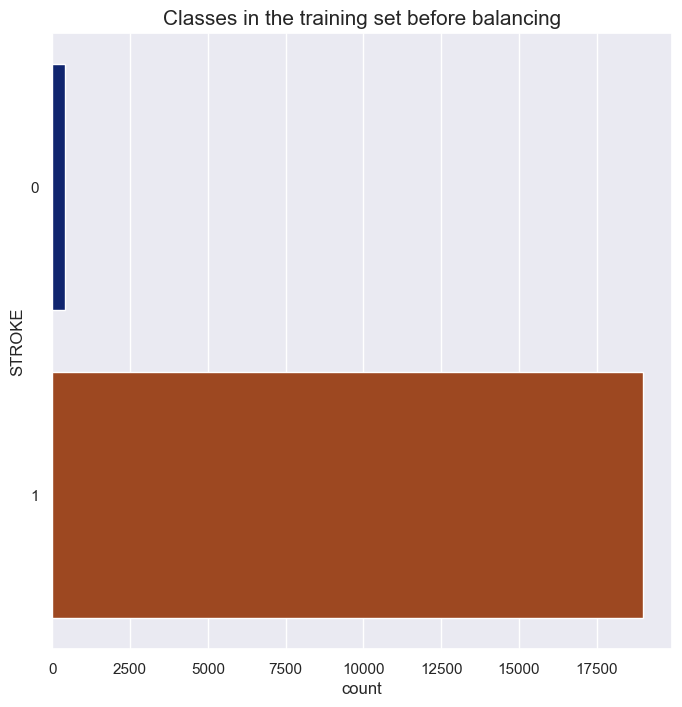

In [14]:
#classes  data balancing
plt.figure(figsize = (8,8))
sns.countplot(y,
             palette = "dark")
plt.title("Classes in the training set before balancing",
         fontdict={"fontsize":15})

In [26]:
from sklearn.model_selection import cross_val_score, cross_val_predict,StratifiedKFold
from sklearn.metrics import roc_auc_score
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
### Before Balancing

[0.86082474 0.81696313 0.80458881 0.8716164  0.82882186]
              precision    recall  f1-score   support

           0       0.04      0.27      0.07       420
           1       0.98      0.85      0.91     18976

    accuracy                           0.84     19396
   macro avg       0.51      0.56      0.49     19396
weighted avg       0.96      0.84      0.89     19396

MSE:  0.16343575995050527
AUC Score: 0.5590864149200996


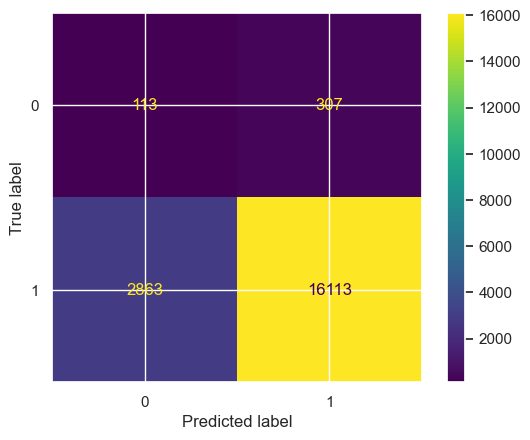

In [27]:

svm = SVC(class_weight = 'balanced') 
cross_val_results = cross_val_score(svm, X, y, cv=kf)
print(cross_val_results)
svm_y_pred = cross_val_predict(svm, X,y,cv=kf)

# Step 5: Generate a classification report
report = classification_report(y, svm_y_pred)
print(report)
print("MSE: ", mean_squared_error(y, svm_y_pred))
svm_auc_score = roc_auc_score(y, svm_y_pred)
print("AUC Score:", svm_auc_score)
cm = confusion_matrix(y, svm_y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

[0.97551546 0.97422016 0.97473576 0.97344676 0.97396236]
              precision    recall  f1-score   support

           0       0.02      0.00      0.01       420
           1       0.98      1.00      0.99     18976

    accuracy                           0.97     19396
   macro avg       0.50      0.50      0.50     19396
weighted avg       0.96      0.97      0.97     19396

MSE:  0.025675396989069912
AUC Score: 0.5002730265799405


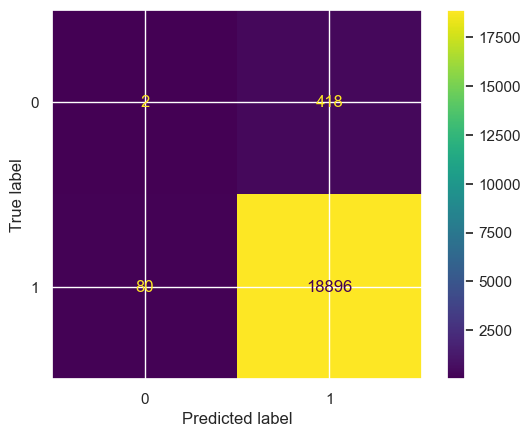

In [28]:
rfc = RandomForestClassifier() 
cross_val_results = cross_val_score(rfc, X, y, cv=kf)
print(cross_val_results)
rfc_y_pred = cross_val_predict(rfc, X, y, cv=kf)

# Step 5: Generate a classification report
report = classification_report(y, rfc_y_pred)
print(report)
print("MSE: ", mean_squared_error(y, rfc_y_pred))
rfc_auc_score = roc_auc_score(y, rfc_y_pred)
print("AUC Score:", rfc_auc_score)
cm = confusion_matrix(y, rfc_y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

[0.97835052 0.97834493 0.97834493 0.97834493 0.97834493]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       420
           1       0.98      1.00      0.99     18976

    accuracy                           0.98     19396
   macro avg       0.49      0.50      0.49     19396
weighted avg       0.96      0.98      0.97     19396

MSE:  0.021653949267890285
AUC Score: 0.5


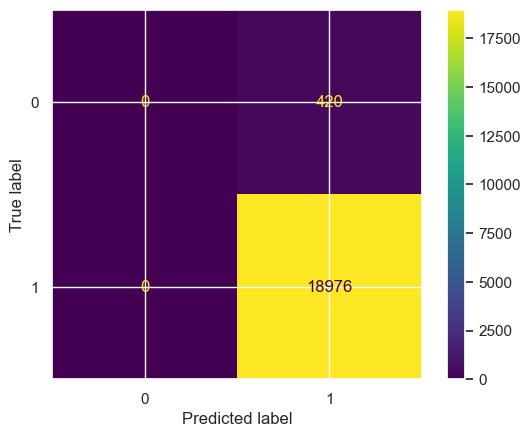

In [29]:
rfc = LogisticRegression() 
cross_val_results = cross_val_score(lg, X, y, cv=kf)
print(cross_val_results)
lg_y_pred = cross_val_predict(lg, X, y, cv=kf)

# Step 5: Generate a classification report
report = classification_report(y, lg_y_pred)
print(report)
print("MSE: ", mean_squared_error(y, lg_y_pred))
lg_auc_score = roc_auc_score(y, lg_y_pred)
print("AUC Score:", lg_auc_score)

cm = confusion_matrix(y, lg_y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

### After Balancing

In [49]:
## data balancing using both skf and SMOTE
for train_index, val_index in stratified_kf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

LogisticRegression - Average AUC: 0.9376, Average MSE: 0.1400, Average Accuracy: 0.8600

Class 0 Metrics:
Precision: 0.8462, Recall: 0.8800, F1-Score: 0.8627

Class 1 Metrics:
Precision: 0.8750, Recall: 0.8400, F1-Score: 0.8571

Confusion Matrix:
[[88. 12.]
 [16. 84.]]



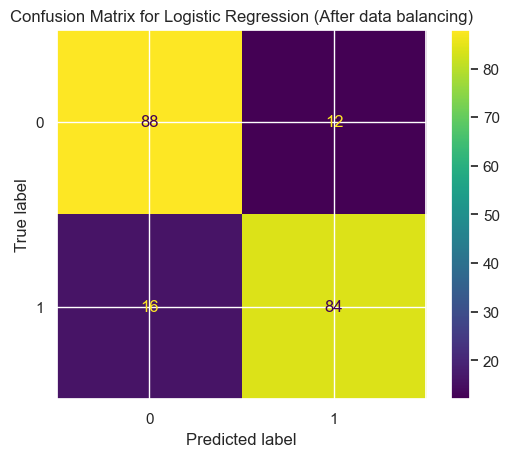

In [59]:
# Initialize storage for metrics
auc_scores_lg = []
mse_scores_lg = []
accuracy_scores_lg = []
confusion_matrices_lg = []
class_reports_lg = []

# Train and evaluate Logistic Regression model
lg.fit(X_train_balanced, y_train_balanced)
y_pred = lg.predict(X_val)
y_probs = lg.predict_proba(X_val)[:, 1]

# Collect metrics
auc_scores_lg.append(roc_auc_score(y_val, y_probs))
mse_scores_lg.append(mean_squared_error(y_val, y_pred))
accuracy_scores_lg.append(accuracy_score(y_val, y_pred))
confusion_matrices_lg.append(confusion_matrix(y_val, y_pred))
class_reports_lg.append(classification_report(y_val, y_pred, output_dict=True))

# Calculate average metrics
avg_auc_lg = np.mean(auc_scores_lg)
avg_mse_lg = np.mean(mse_scores_lg)
avg_accuracy_lg = np.mean(accuracy_scores_lg)
avg_confusion_matrix_lg = np.mean(confusion_matrices_lg, axis=0)

# Calculate average classification report metrics for each class
class_0_metrics = {
    "precision": np.mean([report["0"]["precision"] for report in class_reports_lg]),
    "recall": np.mean([report["0"]["recall"] for report in class_reports_lg]),
    "f1-score": np.mean([report["0"]["f1-score"] for report in class_reports_lg])
}

class_1_metrics = {
    "precision": np.mean([report["1"]["precision"] for report in class_reports_lg]),
    "recall": np.mean([report["1"]["recall"] for report in class_reports_lg]),
    "f1-score": np.mean([report["1"]["f1-score"] for report in class_reports_lg])
}

# Print summary of results
print(f"LogisticRegression - Average AUC: {avg_auc_lg:.4f}, Average MSE: {avg_mse_lg:.4f}, Average Accuracy: {avg_accuracy_lg:.4f}")
print("\nClass 0 Metrics:")
print(f"Precision: {class_0_metrics['precision']:.4f}, Recall: {class_0_metrics['recall']:.4f}, F1-Score: {class_0_metrics['f1-score']:.4f}")
print("\nClass 1 Metrics:")
print(f"Precision: {class_1_metrics['precision']:.4f}, Recall: {class_1_metrics['recall']:.4f}, F1-Score: {class_1_metrics['f1-score']:.4f}")
print(f"\nConfusion Matrix:\n{avg_confusion_matrix_lg}\n")

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=avg_confusion_matrix_lg, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix for Logistic Regression (After data balancing)")
plt.show()


Random Forest- Average AUC: 0.9545, Average MSE: 0.1150, Average Accuracy: 0.8850

Class 0 Metrics:
Precision: 0.8532, Recall: 0.9300, F1-Score: 0.8900

Class 1 Metrics:
Precision: 0.9231, Recall: 0.8400, F1-Score: 0.8796

Confusion Matrix:
[[93.  7.]
 [16. 84.]]



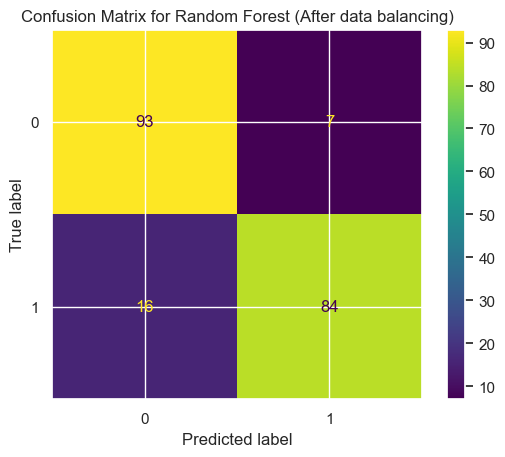

In [62]:
# Initialize storage for metrics
auc_scores_rfc = []
mse_scores_rfc = []
accuracy_scores_rfc= []
confusion_matrices_rfc = []
class_reports_rfc = []

# Train and evaluate Logistic Regression model
rfc.fit(X_train_balanced, y_train_balanced)
y_pred = rfc.predict(X_val)
y_probs = rfc.predict_proba(X_val)[:, 1]

# Collect metrics
auc_scores_rfc.append(roc_auc_score(y_val, y_probs))
mse_scores_rfc.append(mean_squared_error(y_val, y_pred))
accuracy_scores_rfc.append(accuracy_score(y_val, y_pred))
confusion_matrices_rfc.append(confusion_matrix(y_val, y_pred))
class_reports_rfc.append(classification_report(y_val, y_pred, output_dict=True))

# Calculate average metrics
avg_auc_rfc = np.mean(auc_scores_rfc)
avg_mse_rfc = np.mean(mse_scores_rfc)
avg_accuracy_rfc = np.mean(accuracy_scores_rfc)
avg_confusion_matrix_rfc = np.mean(confusion_matrices_rfc, axis=0)

# Calculate average classification report metrics for each class
class_0_metrics = {
    "precision": np.mean([report["0"]["precision"] for report in class_reports_rfc]),
    "recall": np.mean([report["0"]["recall"] for report in class_reports_rfc]),
    "f1-score": np.mean([report["0"]["f1-score"] for report in class_reports_rfc])
}

class_1_metrics = {
    "precision": np.mean([report["1"]["precision"] for report in class_reports_rfc]),
    "recall": np.mean([report["1"]["recall"] for report in class_reports_rfc]),
    "f1-score": np.mean([report["1"]["f1-score"] for report in class_reports_rfc])
}

# Print summary of results
print(f"Random Forest- Average AUC: {avg_auc_rfc:.4f}, Average MSE: {avg_mse_rfc:.4f}, Average Accuracy: {avg_accuracy_rfc:.4f}")
print("\nClass 0 Metrics:")
print(f"Precision: {class_0_metrics['precision']:.4f}, Recall: {class_0_metrics['recall']:.4f}, F1-Score: {class_0_metrics['f1-score']:.4f}")
print("\nClass 1 Metrics:")
print(f"Precision: {class_1_metrics['precision']:.4f}, Recall: {class_1_metrics['recall']:.4f}, F1-Score: {class_1_metrics['f1-score']:.4f}")
print(f"\nConfusion Matrix:\n{avg_confusion_matrix_rfc}\n")

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=avg_confusion_matrix_rfc, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix for Random Forest (After data balancing)")
plt.show()


Support Vector Machine - Average AUC: 0.9281, Average MSE: 0.1450, Average Accuracy: 0.8550

Class 0 Metrics:
Precision: 0.8318, Recall: 0.8900, F1-Score: 0.8599

Class 1 Metrics:
Precision: 0.8817, Recall: 0.8200, F1-Score: 0.8497

Confusion Matrix:
[[89. 11.]
 [18. 82.]]



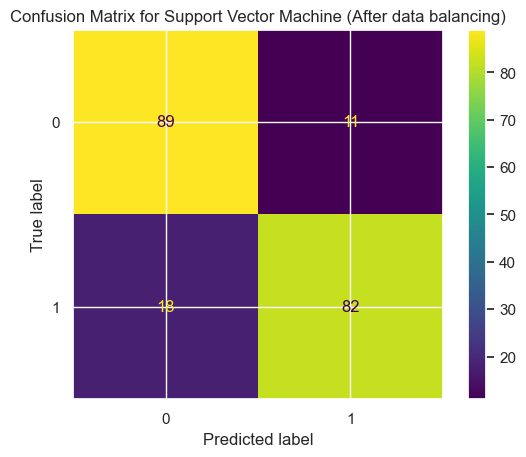

In [64]:
# Initialize storage for metrics
auc_scores_svm = []
mse_scores_svm = []
accuracy_scores_svm= []
confusion_matrices_svm = []
class_reports_svm = []

svm = SVC(probability = True)
# Train and evaluate Logistic Regression model
svm.fit(X_train_balanced, y_train_balanced)
y_pred = svm.predict(X_val)
y_probs = svm.predict_proba(X_val)[:, 1]

# Collect metrics
auc_scores_svm.append(roc_auc_score(y_val, y_probs))
mse_scores_svm.append(mean_squared_error(y_val, y_pred))
accuracy_scores_svm.append(accuracy_score(y_val, y_pred))
confusion_matrices_svm.append(confusion_matrix(y_val, y_pred))
class_reports_svm.append(classification_report(y_val, y_pred, output_dict=True))

# Calculate average metrics
avg_auc_svm = np.mean(auc_scores_svm)
avg_mse_svm = np.mean(mse_scores_svm)
avg_accuracy_svm = np.mean(accuracy_scores_svm)
avg_confusion_matrix_svm = np.mean(confusion_matrices_svm, axis=0)

# Calculate average classification report metrics for each class
class_0_metrics = {
    "precision": np.mean([report["0"]["precision"] for report in class_reports_svm]),
    "recall": np.mean([report["0"]["recall"] for report in class_reports_svm]),
    "f1-score": np.mean([report["0"]["f1-score"] for report in class_reports_svm])
}

class_1_metrics = {
    "precision": np.mean([report["1"]["precision"] for report in class_reports_svm]),
    "recall": np.mean([report["1"]["recall"] for report in class_reports_svm]),
    "f1-score": np.mean([report["1"]["f1-score"] for report in class_reports_svm])
}

# Print summary of results
print(f"Support Vector Machine - Average AUC: {avg_auc_svm:.4f}, Average MSE: {avg_mse_svm:.4f}, Average Accuracy: {avg_accuracy_svm:.4f}")
print("\nClass 0 Metrics:")
print(f"Precision: {class_0_metrics['precision']:.4f}, Recall: {class_0_metrics['recall']:.4f}, F1-Score: {class_0_metrics['f1-score']:.4f}")
print("\nClass 1 Metrics:")
print(f"Precision: {class_1_metrics['precision']:.4f}, Recall: {class_1_metrics['recall']:.4f}, F1-Score: {class_1_metrics['f1-score']:.4f}")
print(f"\nConfusion Matrix:\n{avg_confusion_matrix_svm}\n")

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=avg_confusion_matrix_svm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix for Support Vector Machine (After data balancing)")
plt.show()


In [69]:
from sklearn.ensemble import StackingClassifier
stacked_model = StackingClassifier(
    estimators=[('rfc', rfc),('lg', lg)],
    final_estimator=LogisticRegression()
)

Support Vector Machine - Average AUC: 0.9527, Average MSE: 0.1250, Average Accuracy: 0.8750

Class 0 Metrics:
Precision: 0.8571, Recall: 0.9000, F1-Score: 0.8780

Class 1 Metrics:
Precision: 0.8947, Recall: 0.8500, F1-Score: 0.8718

Confusion Matrix:
[[90. 10.]
 [15. 85.]]



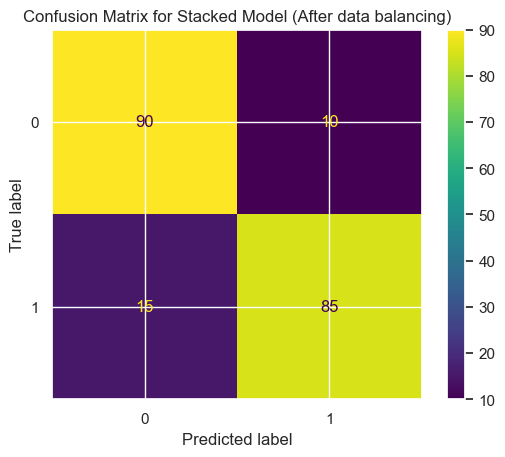

In [70]:
# Initialize storage for metrics
auc_scores_sm = []
mse_scores_sm = []
accuracy_scores_sm= []
confusion_matrices_sm = []
class_reports_sm = []

# Train and evaluate Logistic Regression model
stacked_model.fit(X_train_balanced, y_train_balanced)
y_pred = stacked_model.predict(X_val)
y_probs = stacked_model.predict_proba(X_val)[:, 1]

# Collect metrics
auc_scores_sm.append(roc_auc_score(y_val, y_probs))
mse_scores_sm.append(mean_squared_error(y_val, y_pred))
accuracy_scores_sm.append(accuracy_score(y_val, y_pred))
confusion_matrices_sm.append(confusion_matrix(y_val, y_pred))
class_reports_sm.append(classification_report(y_val, y_pred, output_dict=True))

# Calculate average metrics
avg_auc_sm = np.mean(auc_scores_sm)
avg_mse_sm = np.mean(mse_scores_sm)
avg_accuracy_sm = np.mean(accuracy_scores_sm)
avg_confusion_matrix_sm = np.mean(confusion_matrices_sm, axis=0)

# Calculate average classification report metrics for each class
class_0_metrics = {
    "precision": np.mean([report["0"]["precision"] for report in class_reports_sm]),
    "recall": np.mean([report["0"]["recall"] for report in class_reports_sm]),
    "f1-score": np.mean([report["0"]["f1-score"] for report in class_reports_sm])
}

class_1_metrics = {
    "precision": np.mean([report["1"]["precision"] for report in class_reports_sm]),
    "recall": np.mean([report["1"]["recall"] for report in class_reports_sm]),
    "f1-score": np.mean([report["1"]["f1-score"] for report in class_reports_sm])
}

# Print summary of results
print(f"Support Vector Machine - Average AUC: {avg_auc_sm:.4f}, Average MSE: {avg_mse_sm:.4f}, Average Accuracy: {avg_accuracy_sm:.4f}")
print("\nClass 0 Metrics:")
print(f"Precision: {class_0_metrics['precision']:.4f}, Recall: {class_0_metrics['recall']:.4f}, F1-Score: {class_0_metrics['f1-score']:.4f}")
print("\nClass 1 Metrics:")
print(f"Precision: {class_1_metrics['precision']:.4f}, Recall: {class_1_metrics['recall']:.4f}, F1-Score: {class_1_metrics['f1-score']:.4f}")
print(f"\nConfusion Matrix:\n{avg_confusion_matrix_sm}\n")

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=avg_confusion_matrix_sm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix for Stacked Model (After data balancing)")
plt.show()


In [71]:
metrics_df = pd.DataFrame({"Models":["SVM","RFC","LG"],
                           "Accuracy":[avg_accuracy_sm,avg_accuracy_rfc,avg_accuracy_lg],
                           "AUC":[avg_auc_sm,avg_auc_rfc,avg_auc_lg],
                           "MSE":[avg_mse_sm,avg_mse_rfc,avg_mse_lg]})
metrics_df

,Models,Accuracy,AUC,MSE
0,SVM,0.875,0.95270,0.125
1,RFC,0.885,0.95445,0.115
2,LG,0.860,0.93760,0.140


In [74]:
t_metrics = np.transpose(metrics_df)

([<matplotlib.axis.XTick at 0x27b7544f020>,
 [Text(0, 0, 'SVM'), Text(1, 0, 'RFC'), Text(2, 0, 'LG')])

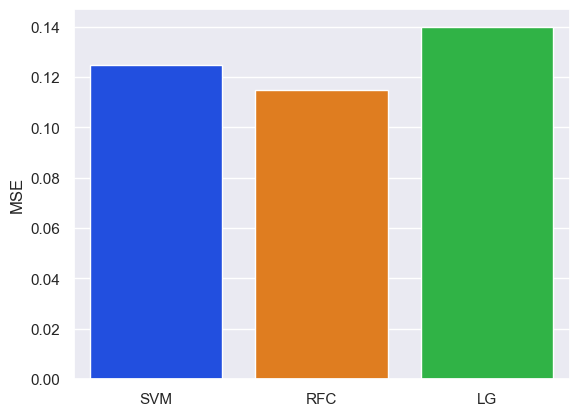

In [85]:
sns.barplot(metrics_df['MSE'], palette = 'bright')
plt.xticks([0,1,2],['SVM',"RFC","LG"])

([<matplotlib.axis.XTick at 0x27b773ccda0>,
 [Text(0, 0, 'SVM'), Text(1, 0, 'RFC'), Text(2, 0, 'LG')])

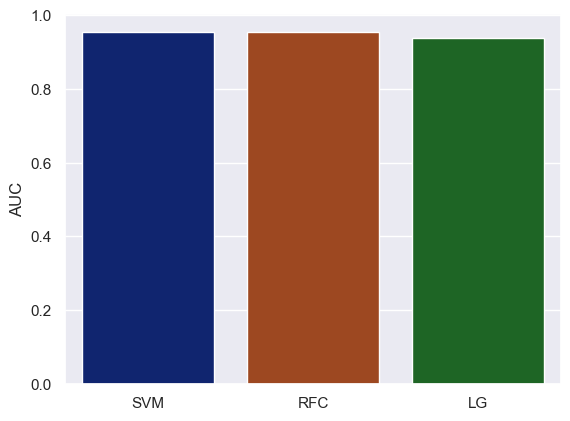

In [87]:
sns.barplot(metrics_df['AUC'], palette = 'dark')
plt.xticks([0,1,2],['SVM',"RFC","LG"])